In [3]:
pip install yfinance

     ---------------------------------------- 63.2/63.2 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 62.6/62.6 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#newest yahoo API 
import yfinance as yf

In [ ]:
msft = yf.Ticker("MSFT")
# get all stock info
msft.info
# get historical market data
hist = msft.history(period="1mo")

In [ ]:
# Params
short_window = 20
long_window = 50

In [ ]:
# Bandas de bollinger
def bollinger_bands(series, num_std, window=20):
    MA = series.rolling(window=window)
    std = MA.std()
    return MA.mean() + num_std * std, MA.mean() - num_std * std

In [ ]:
def moving_average(data: pd.Series, window):
    return data.rolling(window=window).mean()

In [ ]:
def prep_data(df):
    df['TP'] = (df.High +  df.Low +  df.Close) / 3
    df['MA_short'] = moving_average(df.Close, short_window)
    df['MA_long'] = moving_average(df.Close, long_window)
    df['SMA'] = moving_average(df.TP, short_window)
    df['upper_BB'], df['lower_BB'] = bollinger_bands(df.TP, 2)
    return df

In [ ]:
def visual(df, interval: list):
    plt.figure(figsize=(20,10))
    dates = df.index
    plt.plot(dates, df.TP)
    plt.plot(dates, moving_average(df.TP, short_window), color='black')
    plt.plot(dates, df['upper_BB'], label=f'UB', color='red', alpha=0.5)
    plt.plot(dates, df['lower_BB'], label=f'LB', color='green', alpha=0.5)
    #plt.fill_between(dates, df['upper_BB'], df['lower_BB'], color='grey', alpha=0.1)
    plt.title(f'Bollinger Bands on Typical Price {interval}')
    plt.show()

In [ ]:
# Preparing data
interval = ['2019-01-01', '2019-12-30']
data = yf.Ticker('SI=F').history(start=interval[0], end=interval[1])
df = prep_data(data)

In [ ]:
data.shape

(250, 13)

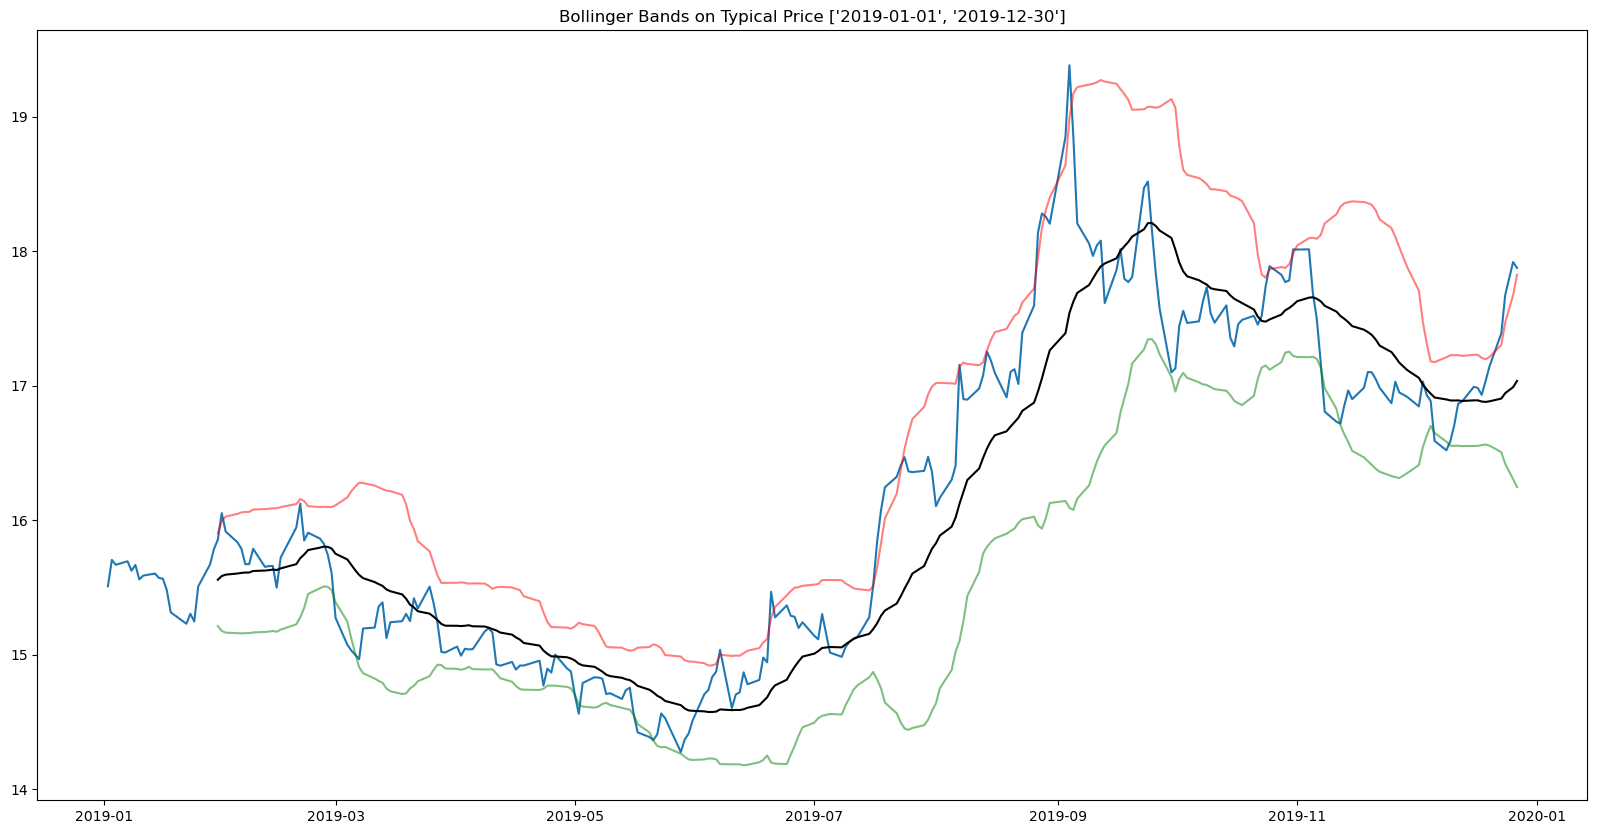

In [ ]:
# Plotting
visual(df[(df.index > interval[0]) & (df.index < interval[1])], interval)